# Cálculo do percentual dos usos do solo em um polígono usando geemap
## Dados: MAPBIOMAS Coleção 5 (acesso através de https://mapbiomas.org/google-earth-engine)

In [3]:
### Carregando as bibliotecas
import os
import ee
import geemap
import geopandas

In [20]:
### Criar um mapa base
Map = geemap.Map()

Map

Map(center=[40, -100], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(T…

In [23]:
### Abrindo os dados do MapBiomas (Coleção 5 ano 2019)
colecao_5_2019 = ee.Image('projects/mapbiomas-workspace/public/collection5/mapbiomas_collection50_integration_v1').select('classification_2019')

Map.addLayer(colecao_5_2019, {}, "Usos do Solo")
Map

Map(bottom=19740.0, center=[-31.80289258670676, -57.96936035156251], controls=(WidgetControl(options=['positio…

In [14]:
### Inserindo o shapefile
### O shapefile é um exemplo, altere para o caminho do seu shapefile
shape_bacia = geemap.shp_to_ee('C:/Users/frori/Documents/UFRGS/Hidrologia II/Area 2/T2/BACIA_PONTO_BARRAGEM.shp')
Map.addLayer(shape_bacia, {}, 'Bacia de interesse')

Map

Map(bottom=19247.0, center=[-27.08847315655588, -50.00427246093751], controls=(WidgetControl(options=['positio…

In [15]:
## Extraindo os dados pelo shape
out_dir = os.path.expanduser('~/Downloads')
area_de_interesse_stats = os.path.join(out_dir, 'area_de_interesse_stats.csv')

if not os.path.exists(out_dir):
    os.makedirs(out_dir)
    
### Calculando a área em km²
geemap.zonal_statistics_by_group(colecao_5_2019, shape_bacia, area_de_interesse_stats, statistics_type = 'SUM', denominator = 1000000, decimal_places = 2)

Computing ... 
Generating URL ...
Please wait ...
Data downloaded to C:\Users\frori\Downloads\area_de_interesse_stats.csv


In [16]:
### Trabalhando com os dados
import pandas as pd

zonal_stats = pd.read_csv('area_de_interesse_stats.csv')

zonal_stats = zonal_stats.drop('Class_sum', axis = 1)
filter_col_class = [col for col in zonal_stats if col.startswith('Class')]

zonal_stats = zonal_stats[filter_col_class]

zonal_stats["id"] = zonal_stats.index + 1
stats_long = zonal_stats.melt(id_vars="id", 
        var_name="classe", 
        value_name="area_km2")

stats_long['perc_area'] = 100 * stats_long['area_km2'] / stats_long['area_km2'].sum()

print(stats_long.head(10))

   id    classe  area_km2  perc_area
0   1  Class_41      7.87  11.053371
1   1   Class_3     34.92  49.044944
2   1  Class_21      6.61   9.283708
3   1   Class_9     10.13  14.227528
4   1  Class_15     10.48  14.719101
5   1  Class_39      1.19   1.671348


In [17]:
### Inserção do nome da classe
dicionario_classes = {
    "Class_1":"Floresta",
    "Class_2":"Floresta Natural",
    "Class_3":"Formação Florestal",
    "Class_4":"Formação Savânica",
    "Class_5":"Mangue",
    "Class_9":"Floresta Plantada",
    "Class_10":"Formação Natural não Florestal",
    "Class_11":"Campo Alagado e Área Pantanosa",
    "Class_12":"Formação Campestre",
    "Class_32":"Apicum",
    "Class_29":"Afloramento Rochoso",
    "Class_13":"Outras Formações não Florestais",
    "Class_14":"Agropecuária",
    "Class_15":"Pastagem",
    "Class_18":"Agricultura",
    "Class_19":"Lavoura Temporária",
    "Class_39":"Soja",
    "Class_20":"Cana",
    "Class_41":"Outras Lavouras Temporárias",
    "Class_36":"Lavoura Perene",
    "Class_21":"Mosaico de Agricultura e Pastagem",
    "Class_22":"Área não Vegetada",
    "Class_23":"Praia e Duna",
    "Class_24":"Infraestrutura Urbana",
    "Class_30":"Mineração",
    "Class_25":"Outras Áreas não Vegetadas",
    "Class_26":"Corpos D'água",
    "Class_33":"Rio, Lago e Oceano",
    "Class_31":"Aquicultura",
    "Class_27":"Não Observado"
}

stats_long['nome_classe'] = stats_long['classe']
stats_long['nome_classe'].replace(dicionario_classes, inplace = True)
stats_long = stats_long.sort_values(by='perc_area', ascending=False)

print(stats_long.head(10))


   id    classe  area_km2  perc_area                        nome_classe
1   1   Class_3     34.92  49.044944                 Formação Florestal
4   1  Class_15     10.48  14.719101                           Pastagem
3   1   Class_9     10.13  14.227528                  Floresta Plantada
0   1  Class_41      7.87  11.053371        Outras Lavouras Temporárias
2   1  Class_21      6.61   9.283708  Mosaico de Agricultura e Pastagem
5   1  Class_39      1.19   1.671348                               Soja


In [18]:
### Inserção das cores de legenda
dicionario_cores = {
    "Class_1":"#129912",
    "Class_2":"#1F4423",
    "Class_3":"#006400",
    "Class_4":"#00ff00",
    "Class_5":"#687537",
    "Class_9":"#935132",
    "Class_10":"#BBFCAC",
    "Class_11":"#45C2A5",
    "Class_12":"#B8AF4F",
    "Class_32":"#968c46",
    "Class_29":"#b2ae7c",
    "Class_13":"#f1c232",
    "Class_14":"#FFFFB2",
    "Class_15":"#FFD966",
    "Class_18":"#E974ED",
    "Class_19":"#D5A6BD",
    "Class_39":"#c59ff4",
    "Class_20":"#C27BA0",
    "Class_41":"#e787f8",
    "Class_36":"#f3b4f1",
    "Class_21":"#fff3bf",
    "Class_22":"#EA9999",
    "Class_23":"#DD7E6B",
    "Class_24":"#aa0000",
    "Class_30":"#af2a2a",
    "Class_25":"#ff0000",
    "Class_26":"#0000FF",
    "Class_33":"#0000FF",
    "Class_31":"#8a2be2",
    "Class_27":"#D5D5E5"
}

<ipython-input-19-58198581dd81>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_value)


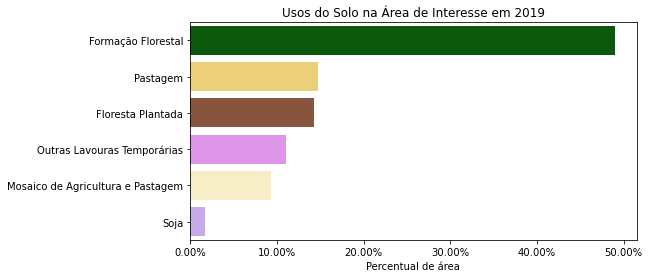

In [19]:
### Visualização dos dados
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize = (8, 4))
p = sns.barplot(y = 'nome_classe',
            x= 'perc_area',
            data = stats_long,
            hue = 'classe',
            palette = dicionario_cores,
            dodge = False)
plt.title("Usos do Solo na Área de Interesse em 2019")
plt.ylabel("")
plt.xlabel("Percentual de área")
plt.legend([],[], frameon=False)
x_value=['{:,.2f}'.format(x) + '%' for x in ax.get_xticks()]
ax.set_xticklabels(x_value)
plt.show()